# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su **capacidad de interpretar los resultados**. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
# Primer punto. Optimización de funciones con `SymPy` (3.4 puntos)

**Volumen mínimo**. Considere un cono circular recto circunscrito en una esfera de radio $r$:

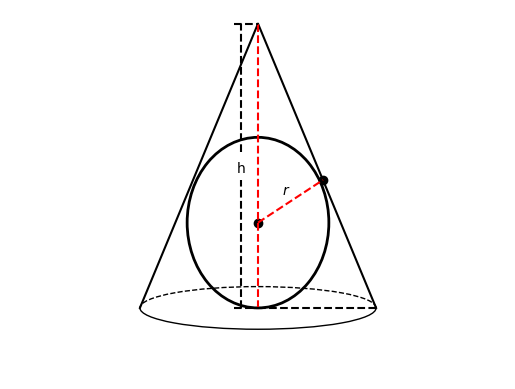

In [ ]:
#@markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, 0), 2,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, 0), 2,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0.6), 0.6,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([1,0,-1],[0,2,0],'k')
plt.plot([0,0],[0,2],'--r')
plt.plot([-0.2,0],[0,0],'--k')
plt.plot([-0.2,0],[2,2],'--k')
plt.plot([-0.14,-0.14],[0,0.9],'--k')
plt.plot([-0.14,-0.14],[1.1,2],'--k')
plt.plot([0,0.55],[0.6,0.9],'--r')
plt.scatter([0,0.55],[0.6,0.9],c='k')
plt.plot([0,1],[0,0],'--k')

plt.text(-0.18,0.95,'h')
plt.text(0.2,0.8,'$r$')

plt.axis([-2.1,2.1,-0.5,2.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (1.4 puntos)

**Volumen del cono:**

Tradicionalmente, sabemos que
$$ V= \frac{1}{3}\pi l^2h,
$$
donde $l$ representa el radio de la base.

Pero en este caso, no conocemos $l$, por lo que para establecer $V$ como función de $h$ primero sé lo siguiente:
* $h$ y $l$ forman un triángulo rectángulo, por lo que siempre van estar relacionados por una proporción: $h=\alpha l$
* De la misma manera, $r$ forma un triángulo rectángulo con la arista del cono, el cual comparte su ángulo superior con el triángulo formado por $h$ y $l$.

Sabiendo que dichos triángulos son correspondientes, podemos establecer una relación entre ellos:
$$ \frac{l}{r}=\frac{h}{\sqrt{(h-r)^2-r^2}},
$$

de manera que podemos despejar $l^2$ para ponerla en términos de $h$ y $r$:

$$ l^2= \frac{hr^2}{h-2r} $$

y al sustituir en la fórmula del volumen, nos queda un volumen dependiente de las variables $h$ y $r$:
$$ V= \frac{\pi h^2r^2}{3(h-2r)}
$$

con el que podemos seguir el ejercicio.

2. Determinar el valor de $h$ que minimiza el volumen para un radio $r=2$. (1 punto)

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


In [61]:
#voy a utilizar variables simbólicas
r,h = sym.symbols('r,h')
def V(h):
  return np.pi*h**2*r**2/3/(h-2*r)
V(h)

1.0471975511966*h**2*r**2/(h - 2*r)

In [63]:
r=2 #dice el problema
dV=V(h).diff()
c=sym.solve(dV,h)
c #voy a utilizar c[1] porque c[0] no es un valor trivial

[0.0, 8.00000000000000]

/tmp/ipython-input-1444106757.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.pi*h**2*r**2/3/(h-2*r)


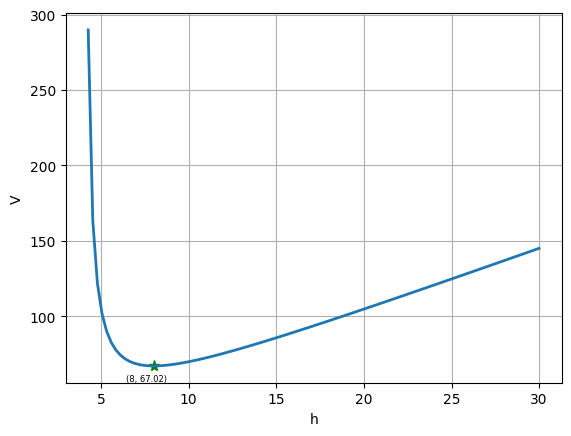

In [64]:
plt.plot(c[1],V(c[1]),'g*', ms=8)
plt.text(c[1]-1.6,V(c[1])-10,f'({c[1]:.0f}, {V(c[1]):.2f})', fontsize=6)
h_num=np.linspace(2*r,30,100) # h debe ser mayor que 2r para que el cono exista.
plt.plot(h_num,V(h_num), lw=2)
plt.xlabel('h')
plt.ylabel('V')
plt.grid()

**Respuesta:**

El valor de $h$ que minimiza el volumen con un $r=2$ es de $8$ u.m.

3. ¿Cuál es el área mínima del cono? (1 punto)

* Área del cono = Área lateral + Área de la base
* Área de la base = $\pi l^2= \frac{\pi hr^2}{h-2r}$
* Área lateral =

---
# Segundo punto. Programación lineal (3.4 puntos)
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(2.2 puntos)}
\end{equation}

**Primer Paso.**
  Se busca maximizar el beneficio, lo cual equivale a maximizar el precio de venta y minimizar el costo. Los datos requeridos para esto son:

  **Precios de venta:**
  * $P1$ se venderá en $4$ u.m.
  * $P2$ se venderá en $3$ u.m.
  * $P3$ se venderá en $2$ u.m.

  **Costos:**
  * Una caja en $M1$ cuesta $3$ u.m.
  * Una caja en $M2$ cuesta $2$ u.m.
  * Una caja en $M3$ cuesta $1$ u.m.



**Segundo Paso.** Establezco las variables:

- $x_{11}$ = Número de cajas de $M1$ por producto $P1$
- $x_{12}$ = Número de cajas de $M1$ por producto $P2$
- $x_{13}$ = Número de cajas de $M1$ por producto $P3$
- $x_{21}$ = Número de cajas de $M2$ por producto $P1$
- $x_{22}$ = Número de cajas de $M2$ por producto $P2$
- $x_{23}$ = Número de cajas de $M2$ por producto $P3$
- $x_{31}$ = Número de cajas de $M3$ por producto $P1$
- $x_{32}$ = Número de cajas de $M3$ por producto $P2$
- $x_{33}$ = Número de cajas de $M3$ por producto $P3$,

sabiendo que:
  * $x_{11}+x_{12}+x_{13}\leq 2000$
  * $x_{21}+x_{22}+x_{23}\leq 4000$
  * $x_{31}+x_{32}+x_{33}\leq 1000$,

y que:

* $-x_{11} \leq-0.8(x_{11}+x_{21}+x_{31})$
* $-x_{12} \leq-0.2(x_{12}+x_{22}+x_{32})$
* $x_{31} \leq0.2(x_{11}+x_{21}+x_{31})$
* $x_{32} \leq0.8(x_{12}+x_{22}+x_{32})$
* $x_{33} \leq0.7(x_{13}+x_{23}+x_{33})$

lo que se traduce a:
+ $-0.2x_{11}+0.8x_{21}+0.8x_{31} \leq 0$
+ $-0.8x_{12}+0.2x_{22}+0.2x_{32} \leq 0$
+ $0.8x_{31}-0.2x_{11}-0.2x_{21} \leq 0$
+ $0.2x_{32}-0.8x_{12}-0.8x_{22} \leq 0$
+ $0.3x_{33}-0.7x_{13}-0.7x_{23} \leq 0$




**Tercer Paso.** Establezco los criterios de optimización:

$$ max_{beneficio}[4(x_{11}+x_{21}+x_{31})+3(x_{12}+x_{22}+x_{32})+2(x_{13}+x_{23}+x_{33})-3(x_{11}+x_{12}+x_{13})-2(x_{21}+x_{22}+x_{23})-(x_{31}+x_{32}+x_{33})]
$$

simplifico, y acomodo a minimizar:
$$ min_{beneficio}[-x_{11}-2x_{21}-3x_{31}-x_{22}-2x_{32}+x_{13}-x_{33}]
$$

por último, para el acomodo inicial:
$$ min_{beneficio}[-x_{11}+0+x_{13}-2x_{21}-x_{22}-0-3x_{31}-2x_{32}-x_{33}]
$$

**Cuarto Paso.** Preparo elementos para linprog:


In [26]:
import numpy as np
import scipy.optimize as opt

In [34]:
c=np.array([-1,0,1,-2,-1,0,-3,-2,-1])
A = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0],         # M1 ≤ 2000
    [0, 0, 0, 1, 1, 1, 0, 0, 0],         # M2 ≤ 4000
    [0, 0, 0, 0, 0, 0, 1, 1, 1],         # M3 ≤ 1000
    [-0.2, 0, 0, 0.8, 0, 0, 0.8, 0, 0],  # P1: ≥ 80% M1
    [-0.2, 0, 0, -0.2, 0, 0, 0.8, 0, 0], # P1: ≤ 20% M3
    [0, -0.8, 0, 0, 0.2, 0, 0, 0.2, 0],  # P2: ≥ 20% M1
    [0, -0.8, 0, 0, -0.8, 0, 0, 0.2, 0], # P2: ≤ 80% M3
    [0, 0, -0.7, 0, 0, -0.7, 0, 0, 0.3]  # P3: ≤ 70% M3
])
b=np.array([2000, 4000, 1000, 0, 0, 0, 0, 0])

2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera? (1.2 puntos)

In [35]:
opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -7000.0
              x: [ 8.000e+02  1.200e+03  0.000e+00 -0.000e+00  4.000e+03
                   0.000e+00  2.000e+02  8.000e+02  0.000e+00]
            nit: 5
          lower:  residual: [ 8.000e+02  1.200e+03  0.000e+00 -0.000e+00
                              4.000e+03  0.000e+00  2.000e+02  8.000e+02
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  2.333e+00  0.000e+00
                              0.000e+00  6.667e-01  0.000e+00  0.000e+00
                              6.667e-01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0

**Resultado:**

El mayor beneficio posible es de $7,000$ u.m., el cual se puede obtener utilizando las siguientes cantidades por producto:
* Para $P1$: $800$ cajas de $M1$ y $200$ de $M3$
* Para $P2$: $1200$ cajas de $M1$, $4000$ de $M2$ y $800$ de $M3$
* Para $P3$: 0

Se alcanza el límite de cajas de cada marca, y se obtienen únicamente dos productos: $P1$ y $P2$.

---
# Tercer punto. Ajuste de curvas (3.4 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [42]:
import pandas as pd

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban

/tmp/ipython-input-1613858795.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')


,values
date,
1988-12-31,594.6
1989-12-31,643.0
1990-12-31,725.5
1991-12-31,880.4
1992-12-31,972.5
1993-12-31,918.7
1994-12-31,845.3
1995-12-31,858.1
1996-12-31,1042.1


1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores cuadráticos de forma gráfica, ¿Qué polinómio se ajusta mejor? (2 puntos)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
x_orig=date_rng.to_numpy() #reemplazo el datetime por un arreglo que pueda usar.
x=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
y=ban['values']

In [45]:
def fhat(b,x):
    X=np.array([x**i for i in range(len(b))]).T
    return X@b
def error(b,x,y):
    return np.sum((y-fhat(b,x))**2)

In [46]:
#busco minimizarlo
b_inicial_1=np.random.rand(2)
sol_1=opt.minimize(error, b_inicial_1, args=(x, y))
b_opt_1=sol_1.x

b_inicial_2=np.random.rand(3)
sol_2=opt.minimize(error, b_inicial_2, args=(x, y))
b_opt_2=sol_2.x

b_inicial_3=np.random.rand(4)
sol_3=opt.minimize(error, b_inicial_3, args=(x, y))
b_opt_3=sol_3.x

b_inicial_4=np.random.rand(5)
sol_4=opt.minimize(error, b_inicial_4, args=(x, y))
b_opt_4=sol_4.x

b_inicial_5=np.random.rand(6)
sol_5=opt.minimize(error, b_inicial_5, args=(x, y))
b_opt_5=sol_5.x

In [51]:
suma_error=[sol_1.fun, sol_2.fun, sol_3.fun, sol_4.fun, sol_5.fun]
polis=[1,2,3,4,5]

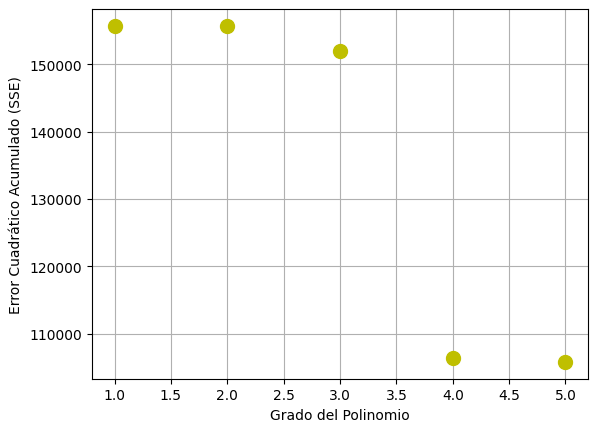

In [53]:
plt.plot(polis, suma_error, 'yo', ms=10)
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Acumulado (SSE)')
plt.grid()

Esto me dice que el polinomio de grado 5 tiene menor error.

2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (0.7 puntos)

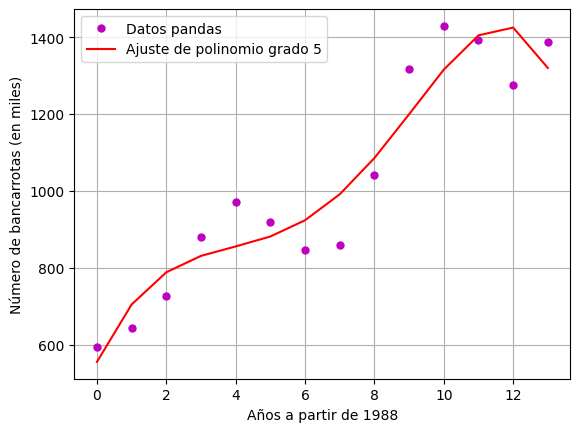

In [55]:
plt.plot(x, y, 'mo', ms=5, label='Datos pandas')
yfit_5=fhat(b_opt_5, x)
plt.plot(x, yfit_5, 'r-', label='Ajuste de polinomio grado 5')
plt.xlabel('Años a partir de 1988')
plt.ylabel('Número de bancarrotas (en miles)')
plt.legend()
plt.grid()

3. Usar el modelo para averiguar el número de bancarrotas a mdiados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (0.7 puntos)

In [57]:
def quinto_poli(x):
  x=x-1988 #año
  return b_opt_5[0]+b_opt_5[1]*x+b_opt_5[2]*x**2+b_opt_5[3]*x**3+b_opt_5[4]*x**4+b_opt_5[5]*x**5

In [58]:
quinto_poli(1995)

np.float64(991.29610125763)

Esto nos dice que en 1995 un aproximado de $991000$ personas cayeron en bancarrota.

In [59]:
quinto_poli(2020)

np.float64(-251444.30100001878)

Se va a números negativos por la tendencia en el contexto de los datos del pandas, lo que quiere decir que el modelo del quinto polinomio no es adecuado para extrapolar en este caso.

La interpolación es bastante acertada, mientras que la extrapolación es imposible.